In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tkinter import * 

In [2]:
data = pd.read_csv("C:\\Users\\Shruti Tiwari\\Downloads\\Machine-Learning-with-Python-GFG-main\\Machine-Learning-with-Python-GFG-main\\Linear Regression\\data_for_lr.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


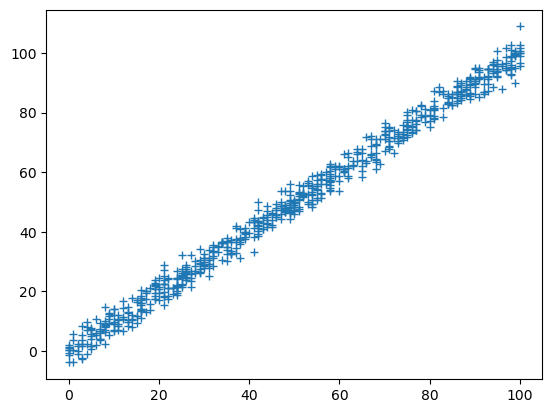

In [3]:
plt.plot(data["x"],data['y'],"+")
plt.show()

In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
data.dropna()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
x = np.array(data["x"]).reshape(700,1)
y = np.array(data["y"]).reshape(700,1)


# Forward Propogation   f(x)= m * x + c

In [7]:
def forward_propo(x, parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m, x) + c
    return predictions

# Cost funtion  summation(y^ - y)^2  x 1/2n

In [8]:
def cost_function(predictions, y):
    cost = np.mean((predictions - y)**2)*0.5
    return cost

# Gradient Descent   *df = y^-y/n, dm  = df* x *x, dc = df*

In [9]:
def backward_propo(predictions, x, y):
    derivatives = dict()
    df = np.mean(predictions - y)
    dm = np.multiply(df, x) 
    dc = np.multiply(df,1)
    derivatives["dm"] = dm
    derivatives['dc'] = dc
    return derivatives

#  Update parameter *m = m - learningrate x dm, c = c - learningrate x dc* 

In [10]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]
    return parameters

# Trainning model

In [11]:
def train(x, y, learning_rate, iters):
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1)
   
    
    loss = list()
    #iterations
    for i  in range (iters):
        predictions = forward_propo(x, parameters)
        cost = cost_function(predictions, y)
        loss.append(cost)
        print(f"Iteration no = {i+1}, Loss = {cost}")
        
        
        derivatives = backward_propo(predictions, x, y)
        parameters = update_parameters(parameters, derivatives, learning_rate)
    return parameters

In [12]:
parameters = train(data['x'], data['y'], 0.0001, 10)
parameters["m"][len(data)-1]



Iteration no = 1, Loss = 396.5721272923306
Iteration no = 2, Loss = 160.61097455662576
Iteration no = 3, Loss = 69.2714540364506
Iteration no = 4, Loss = 37.63408318538126
Iteration no = 5, Loss = 29.515021027120472
Iteration no = 6, Loss = 29.853340044145188
Iteration no = 7, Loss = 32.627628314762084
Iteration no = 8, Loss = 35.606156253832616
Iteration no = 9, Loss = 38.09158284762207
Iteration no = 10, Loss = 39.96949463901153


1.1933372520854646

In [13]:
m = parameters["m"][len(data)-1]
c = parameters['c']
x = int(input("Write the value for your x"))
ans = m*x+c

print(ans)
    

Write the value for your x5
6.532650562319158


# Basic Interface 

In [15]:
m = parameters["m"][len(data)-1]
c = parameters['c']
root = Tk()
root.title("Predict")
root.geometry("400x200+450+300")
f1= Frame(root)
in_lbl =  Label(f1,text = "Write the value of X :", fg = "black", font = ("Arabic",10) )
in_lbl.pack(side = "left")
in_ent =  Entry(f1, width = 15,)
in_ent.pack(side=  "left")
f1.pack()

f2 = Frame(root)
gen_but = Button(f2, text ="GENERATE Y", activebackground="gray", height=5, width = 25, command= lambda:(generate(m,c)))
gen_but.pack(pady = 20)
f2.pack()
f3 =  Frame(root)
out_lbl =  Label(f3, text = "", font = ("Arabic", 20), fg = "red")    
out_lbl.pack()
f3.pack()


def generate(m,c):
    x=  int(in_ent.get())
    ans = m*x+c
    out_lbl.config(text = ans)
    

mainloop()